# Convolutional Neural Network
# modified to work with the kaggle dogs and cats database

### Importing the Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
import time

2023-10-20 22:53:57.272047: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-20 22:53:57.272127: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-20 22:53:57.272157: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-20 22:53:57.279560: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-20 22:53:58.282549: W tensorflow/compiler/

## Part 1- Data Preprocessing

### kaggle dataset operation

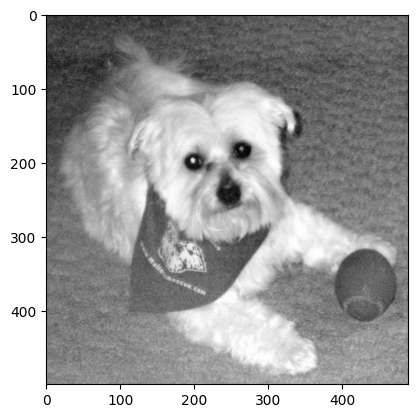

Data Array:
 [[ 59  60  49 ...  92  90  94]
 [ 59  61  53 ...  87  87 100]
 [ 65  69  61 ...  90  97 101]
 ...
 [135 126 133 ... 146 156 150]
 [137 132 139 ... 144 152 145]
 [139 138 147 ... 147 156 146]] 

Data Shape: (500, 489)


In [2]:
#Iterate and convert datasets to an array.

DATADIR = "kagglecatsanddogs_5340/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to dataset directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

# Checking Data
print('Data Array:\n',img_array,'\n')
print('Data Shape:',img_array.shape)

### Resizing the image

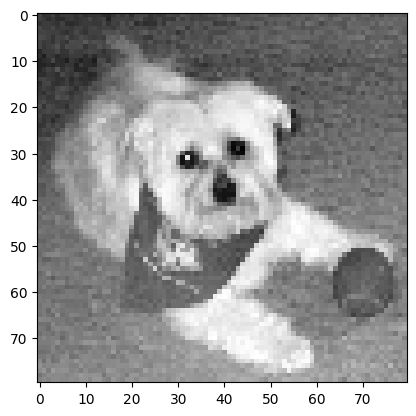

In [3]:
IMG_SIZE = 80
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

### Preprocessing the Training set

In [4]:


# Create dataset for training

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) # categories for dog(0) and cat(1)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
create_training_data()


Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


In [5]:
print(len(training_data))
print(training_data[0])


24946
[array([[ 69,  52,  54, ...,  97,  99,  91],
       [ 68,  59,  48, ..., 109, 100, 108],
       [ 55,  63,  63, ..., 102, 102, 103],
       ...,
       [139, 150, 126, ..., 154, 131, 144],
       [118, 130, 141, ..., 167, 164, 153],
       [130, 140, 133, ..., 154, 165, 155]], dtype=uint8), 0]


### shuffle the data

In [6]:
# Reshuffle Data
random.shuffle(training_data)

# Check the shuffled data
for sample in training_data [:10]:
    print(sample[1])

0
1
1
1
0
0
1
1
1
0


## Create a list for training data

In [13]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.asarray(X)
y = np.asarray(y)
X = tf.expand_dims(X, axis=-1)
X = tf.cast(X, tf.float32)

## Build model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

cnn = Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
cnn.add((tf.keras.layers.MaxPool2D(pool_size=2, strides=2)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
cnn.add((tf.keras.layers.MaxPool2D(pool_size=2, strides=2)))
cnn.add(tf.keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE)))
cnn.add(tf.keras.layers.Dense(units=128, activation="relu", input_shape = (None, 100)))
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn.fit(X, y, epochs=10)

2023-10-20 22:59:30.443215: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 638617600 exceeds 10% of free system memory.


Epoch 1/10


2023-10-20 22:59:31.793835: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905
2023-10-20 22:59:34.317674: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe584acd2d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-20 22:59:34.317718: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 980 Ti, Compute Capability 5.2
2023-10-20 22:59:34.329419: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-20 22:59:34.449050: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


780/780 [==============================] - 12s 10ms/step - loss: 1.1483 - accuracy: 0.5874
Epoch 2/10
780/780 [==============================] - 8s 10ms/step - loss: 0.6248 - accuracy: 0.6525
Epoch 3/10
780/780 [==============================] - 8s 10ms/step - loss: 0.5484 - accuracy: 0.7196
Epoch 4/10
780/780 [==============================] - 8s 10ms/step - loss: 0.4477 - accuracy: 0.7862
Epoch 5/10
780/780 [==============================] - 8s 10ms/step - loss: 0.3147 - accuracy: 0.8625
Epoch 6/10
780/780 [==============================] - 8s 10ms/step - loss: 0.2108 - accuracy: 0.9135
Epoch 7/10
780/780 [==============================] - 8s 10ms/step - loss: 0.1397 - accuracy: 0.9473
Epoch 8/10
780/780 [==============================] - 7s 10ms/step - loss: 0.1114 - accuracy: 0.9615
Epoch 9/10
780/780 [==============================] - 7s 10ms/step - loss: 0.0855 - accuracy: 0.9697
Epoch 10/10
780/780 [==============================] - 7s 9ms/step - loss: 0.0752 - accuracy: 0.9740
